In [1]:
print("hello")

hello


In [2]:
import pandas as pd 

In [173]:
df = pd.read_csv("data\\diabetes_data.csv")

In [133]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(70692, 18)

In [174]:
def assign_condition(row):
    diabetes = row['Diabetes'] == 1.0
    stroke = row['Stroke'] == 1.0
    highbp = row['HighBP'] == 1.0
    
    if diabetes and stroke and highbp:
        return 6
    elif diabetes and stroke:
        return 5
    elif diabetes and highbp:
        return 4
    elif stroke and highbp:
        return 3
    elif diabetes:
        return 1
    elif highbp:
        return 2
    elif stroke:
        return 7
    else:
        return 0  

df['ConditionLabel'] = df.apply(assign_condition, axis=1)



In [7]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes,ConditionLabel
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0,1
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,2
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,-1
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,1
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


In [8]:
df['ConditionLabel'].value_counts()

ConditionLabel
 3    23813
-1    21769
 1    12450
 0     8265
 5     2791
 2      778
 4      477
 6      349
Name: count, dtype: int64

In [9]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes', 'ConditionLabel'],
      dtype='object')

In [10]:
df2 = pd.read_csv("data\\personal_health_data.csv")

In [11]:
df2.head()

,User_ID,Age,Gender,Weight,Height,Medical_Conditions,Medication,Smoker,Alcohol_Consumption,Timestamp,...,ECG,Calories_Intake,Water_Intake,Stress_Level,Mood,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Anomaly_Flag
0,U_00001,61,Other,88.677623,178.524231,Diabetes,No,No,Moderate,2021-01-01 00:00:00,...,Abnormal,2444.985808,3.105556,Moderate,Neutral,32.752993,17.432985,77.599448,25.992071,1
1,U_00002,24,Male,86.742084,200.346358,NaN,Yes,No,Moderate,2021-01-01 01:00:00,...,Normal,2199.777020,2.441118,High,Anxious,35.010044,23.957792,71.718936,64.308450,0
2,U_00003,81,Other,61.656054,195.971356,Hypertension,Yes,No,Moderate,2021-01-01 02:00:00,...,Abnormal,2182.755640,1.240341,Low,Sad,36.797523,22.995533,59.874936,78.003546,1
3,U_00004,70,Other,141.513794,164.178216,Hypertension,No,No,Heavy,2021-01-01 03:00:00,...,Normal,1451.218888,1.682383,Moderate,Happy,32.614592,13.410659,67.528098,16.454106,1
4,U_00005,30,Other,80.552872,146.920675,Diabetes,Yes,Yes,Heavy,2021-01-01 04:00:00,...,Normal,1583.562773,1.461862,High,Happy,33.602319,24.920020,54.741487,42.528202,0


In [12]:
df2['Medical_Conditions'].value_counts()

Medical_Conditions
Diabetes        3359
Hypertension    3337
Name: count, dtype: int64

In [65]:
new_df = df2.copy()

In [66]:
new_df.columns

Index(['User_ID', 'Age', 'Gender', 'Weight', 'Height', 'Medical_Conditions',
       'Medication', 'Smoker', 'Alcohol_Consumption', 'Timestamp',
       'Day_of_Week', 'Sleep_Duration', 'Deep_Sleep_Duration',
       'REM_Sleep_Duration', 'Wakeups', 'Snoring', 'Heart_Rate',
       'Blood_Oxygen_Level', 'ECG', 'Calories_Intake', 'Water_Intake',
       'Stress_Level', 'Mood', 'Skin_Temperature', 'Body_Fat_Percentage',
       'Muscle_Mass', 'Health_Score', 'Anomaly_Flag'],
      dtype='object')

In [67]:
new_df = new_df.drop(columns=['User_ID','Mood','Calories_Intake','Water_Intake','Timestamp','Day_of_Week','Medication'],axis=1)

In [68]:
new_df.head()

,Age,Gender,Weight,Height,Medical_Conditions,Smoker,Alcohol_Consumption,Sleep_Duration,Deep_Sleep_Duration,REM_Sleep_Duration,Wakeups,Snoring,Heart_Rate,Blood_Oxygen_Level,ECG,Stress_Level,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Anomaly_Flag
0,61,Other,88.677623,178.524231,Diabetes,No,Moderate,6.518206,2.785033,3.733173,4,Yes,147,90.658505,Abnormal,Moderate,32.752993,17.432985,77.599448,25.992071,1
1,24,Male,86.742084,200.346358,NaN,No,Moderate,7.522446,0.874391,6.648056,2,Yes,147,97.133360,Normal,High,35.010044,23.957792,71.718936,64.308450,0
2,81,Other,61.656054,195.971356,Hypertension,No,Moderate,8.583386,6.760476,1.822910,2,No,176,99.555594,Abnormal,Low,36.797523,22.995533,59.874936,78.003546,1
3,70,Other,141.513794,164.178216,Hypertension,No,Heavy,4.425767,2.645596,1.780171,2,Yes,157,91.444900,Normal,Moderate,32.614592,13.410659,67.528098,16.454106,1
4,30,Other,80.552872,146.920675,Diabetes,Yes,Heavy,6.008918,4.440672,1.568247,3,No,86,96.092103,Normal,High,33.602319,24.920020,54.741487,42.528202,0


In [69]:
new_df.isna().sum()

Age                       0
Gender                    0
Weight                    0
Height                    0
Medical_Conditions     3304
Smoker                    0
Alcohol_Consumption    3360
Sleep_Duration            0
Deep_Sleep_Duration       0
REM_Sleep_Duration        0
Wakeups                   0
Snoring                   0
Heart_Rate                0
Blood_Oxygen_Level        0
ECG                       0
Stress_Level              0
Skin_Temperature          0
Body_Fat_Percentage       0
Muscle_Mass               0
Health_Score              0
Anomaly_Flag              0
dtype: int64

In [70]:
new_df = new_df.dropna(subset=['Alcohol_Consumption'])

In [71]:
new_df.isna().sum()

Age                       0
Gender                    0
Weight                    0
Height                    0
Medical_Conditions     2199
Smoker                    0
Alcohol_Consumption       0
Sleep_Duration            0
Deep_Sleep_Duration       0
REM_Sleep_Duration        0
Wakeups                   0
Snoring                   0
Heart_Rate                0
Blood_Oxygen_Level        0
ECG                       0
Stress_Level              0
Skin_Temperature          0
Body_Fat_Percentage       0
Muscle_Mass               0
Health_Score              0
Anomaly_Flag              0
dtype: int64

In [72]:
new_df.shape

(6640, 21)

In [73]:
pd.set_option('display.max_columns', None)

In [74]:
new_df.head()

,Age,Gender,Weight,Height,Medical_Conditions,Smoker,Alcohol_Consumption,Sleep_Duration,Deep_Sleep_Duration,REM_Sleep_Duration,Wakeups,Snoring,Heart_Rate,Blood_Oxygen_Level,ECG,Stress_Level,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Anomaly_Flag
0,61,Other,88.677623,178.524231,Diabetes,No,Moderate,6.518206,2.785033,3.733173,4,Yes,147,90.658505,Abnormal,Moderate,32.752993,17.432985,77.599448,25.992071,1
1,24,Male,86.742084,200.346358,NaN,No,Moderate,7.522446,0.874391,6.648056,2,Yes,147,97.133360,Normal,High,35.010044,23.957792,71.718936,64.308450,0
2,81,Other,61.656054,195.971356,Hypertension,No,Moderate,8.583386,6.760476,1.822910,2,No,176,99.555594,Abnormal,Low,36.797523,22.995533,59.874936,78.003546,1
3,70,Other,141.513794,164.178216,Hypertension,No,Heavy,4.425767,2.645596,1.780171,2,Yes,157,91.444900,Normal,Moderate,32.614592,13.410659,67.528098,16.454106,1
4,30,Other,80.552872,146.920675,Diabetes,Yes,Heavy,6.008918,4.440672,1.568247,3,No,86,96.092103,Normal,High,33.602319,24.920020,54.741487,42.528202,0


In [75]:
new_df['Gender'].value_counts()

Gender
Female    2242
Other     2209
Male      2189
Name: count, dtype: int64

In [76]:
new_df.describe()

,Age,Weight,Height,Sleep_Duration,Deep_Sleep_Duration,REM_Sleep_Duration,Wakeups,Heart_Rate,Blood_Oxygen_Level,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Anomaly_Flag
count,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000
mean,47.783434,90.570968,170.511745,7.034890,3.766106,3.268784,2.016265,115.576506,95.449729,35.508471,22.469583,50.289379,48.462054,0.618976
std,21.904318,34.607232,17.593593,1.746764,2.140676,2.144574,1.420497,37.772085,3.173587,2.020029,7.219114,17.379932,17.867948,0.485675
min,10.000000,30.001125,140.008892,4.000691,0.501065,0.001013,0.000000,50.000000,90.002518,32.001110,10.002488,20.000336,0.000000,0.000000
25%,29.000000,60.842825,155.473165,5.538759,2.003354,1.516492,1.000000,82.750000,92.687363,33.769487,16.230787,35.337236,34.932417,0.000000
50%,48.000000,90.127462,170.706826,7.021088,3.505541,3.034801,2.000000,116.000000,95.413306,35.492962,22.366949,50.084737,48.419954,1.000000
75%,67.000000,120.449890,185.641558,8.583406,5.180070,4.708319,3.000000,148.000000,98.160583,37.263522,28.697038,65.305165,61.744317,1.000000
max,85.000000,150.978482,200.998406,9.999370,9.885577,9.414406,4.000000,180.000000,100.999086,38.999370,34.997826,79.998756,95.853674,1.000000


In [77]:
cat_cols = new_df.select_dtypes(include=['object', 'category']).columns

In [78]:
cat_cols

Index(['Gender', 'Medical_Conditions', 'Smoker', 'Alcohol_Consumption',
       'Snoring', 'ECG', 'Stress_Level'],
      dtype='object')

In [79]:
new_df.select_dtypes(include=['object', 'category'])

,Gender,Medical_Conditions,Smoker,Alcohol_Consumption,Snoring,ECG,Stress_Level
0,Other,Diabetes,No,Moderate,Yes,Abnormal,Moderate
1,Male,NaN,No,Moderate,Yes,Normal,High
2,Other,Hypertension,No,Moderate,No,Abnormal,Low
3,Other,Hypertension,No,Heavy,Yes,Normal,Moderate
4,Other,Diabetes,Yes,Heavy,No,Normal,High
...,...,...,...,...,...,...,...
9993,Other,Diabetes,Yes,Heavy,Yes,Abnormal,High
9994,Male,Diabetes,No,Moderate,Yes,Normal,Moderate
9995,Female,Hypertension,No,Heavy,No,Abnormal,High
9998,Female,Diabetes,No,Moderate,Yes,Abnormal,Moderate


In [80]:
new_df['Medical_Conditions'] = new_df['Medical_Conditions'].fillna("Normal")

In [81]:
new_df['Gender'] = new_df['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
new_df['Smoker'] = new_df['Smoker'].map({'Yes': 1, 'No': 0})
new_df['Alcohol_Consumption'] = new_df['Alcohol_Consumption'].map({'Moderate': 0, 'Heavy': 1})
new_df['Snoring'] = new_df['Snoring'].map({'Yes': 1, 'No': 0})
new_df['ECG'] = new_df['ECG'].map({'Normal': 0, 'Abnormal': 1})
new_df['Stress_Level'] = new_df['Stress_Level'].map({'Low': 0, 'Moderate': 1, 'High': 2})



In [82]:
new_df.isna().sum()

Age                    0
Gender                 0
Weight                 0
Height                 0
Medical_Conditions     0
Smoker                 0
Alcohol_Consumption    0
Sleep_Duration         0
Deep_Sleep_Duration    0
REM_Sleep_Duration     0
Wakeups                0
Snoring                0
Heart_Rate             0
Blood_Oxygen_Level     0
ECG                    0
Stress_Level           0
Skin_Temperature       0
Body_Fat_Percentage    0
Muscle_Mass            0
Health_Score           0
Anomaly_Flag           0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

In [84]:
le = LabelEncoder()


In [85]:
new_df['Medical_Conditions'] = le.fit_transform(new_df['Medical_Conditions'].astype(str))


In [86]:
new_df.head()

,Age,Gender,Weight,Height,Medical_Conditions,Smoker,Alcohol_Consumption,Sleep_Duration,Deep_Sleep_Duration,REM_Sleep_Duration,Wakeups,Snoring,Heart_Rate,Blood_Oxygen_Level,ECG,Stress_Level,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Anomaly_Flag
0,61,2,88.677623,178.524231,0,0,0,6.518206,2.785033,3.733173,4,1,147,90.658505,1,1,32.752993,17.432985,77.599448,25.992071,1
1,24,0,86.742084,200.346358,2,0,0,7.522446,0.874391,6.648056,2,1,147,97.133360,0,2,35.010044,23.957792,71.718936,64.308450,0
2,81,2,61.656054,195.971356,1,0,0,8.583386,6.760476,1.822910,2,0,176,99.555594,1,0,36.797523,22.995533,59.874936,78.003546,1
3,70,2,141.513794,164.178216,1,0,1,4.425767,2.645596,1.780171,2,1,157,91.444900,0,1,32.614592,13.410659,67.528098,16.454106,1
4,30,2,80.552872,146.920675,0,1,1,6.008918,4.440672,1.568247,3,0,86,96.092103,0,2,33.602319,24.920020,54.741487,42.528202,0


In [87]:
new_df.columns

Index(['Age', 'Gender', 'Weight', 'Height', 'Medical_Conditions', 'Smoker',
       'Alcohol_Consumption', 'Sleep_Duration', 'Deep_Sleep_Duration',
       'REM_Sleep_Duration', 'Wakeups', 'Snoring', 'Heart_Rate',
       'Blood_Oxygen_Level', 'ECG', 'Stress_Level', 'Skin_Temperature',
       'Body_Fat_Percentage', 'Muscle_Mass', 'Health_Score', 'Anomaly_Flag'],
      dtype='object')

In [88]:
numeric_cols = new_df.select_dtypes(include=['float64', 'int64']).columns


for col in numeric_cols:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = new_df[(new_df[col] < lower_bound) | (new_df[col] > upper_bound)]

    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print('-'*30)

Column: Age
Number of outliers: 0
------------------------------
Column: Gender
Number of outliers: 0
------------------------------
Column: Weight
Number of outliers: 0
------------------------------
Column: Height
Number of outliers: 0
------------------------------
Column: Medical_Conditions
Number of outliers: 0
------------------------------
Column: Smoker
Number of outliers: 0
------------------------------
Column: Alcohol_Consumption
Number of outliers: 0
------------------------------
Column: Sleep_Duration
Number of outliers: 0
------------------------------
Column: Deep_Sleep_Duration
Number of outliers: 0
------------------------------
Column: REM_Sleep_Duration
Number of outliers: 0
------------------------------
Column: Wakeups
Number of outliers: 0
------------------------------
Column: Snoring
Number of outliers: 0
------------------------------
Column: Heart_Rate
Number of outliers: 0
------------------------------
Column: Blood_Oxygen_Level
Number of outliers: 0
------

In [21]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt


<Axes: >

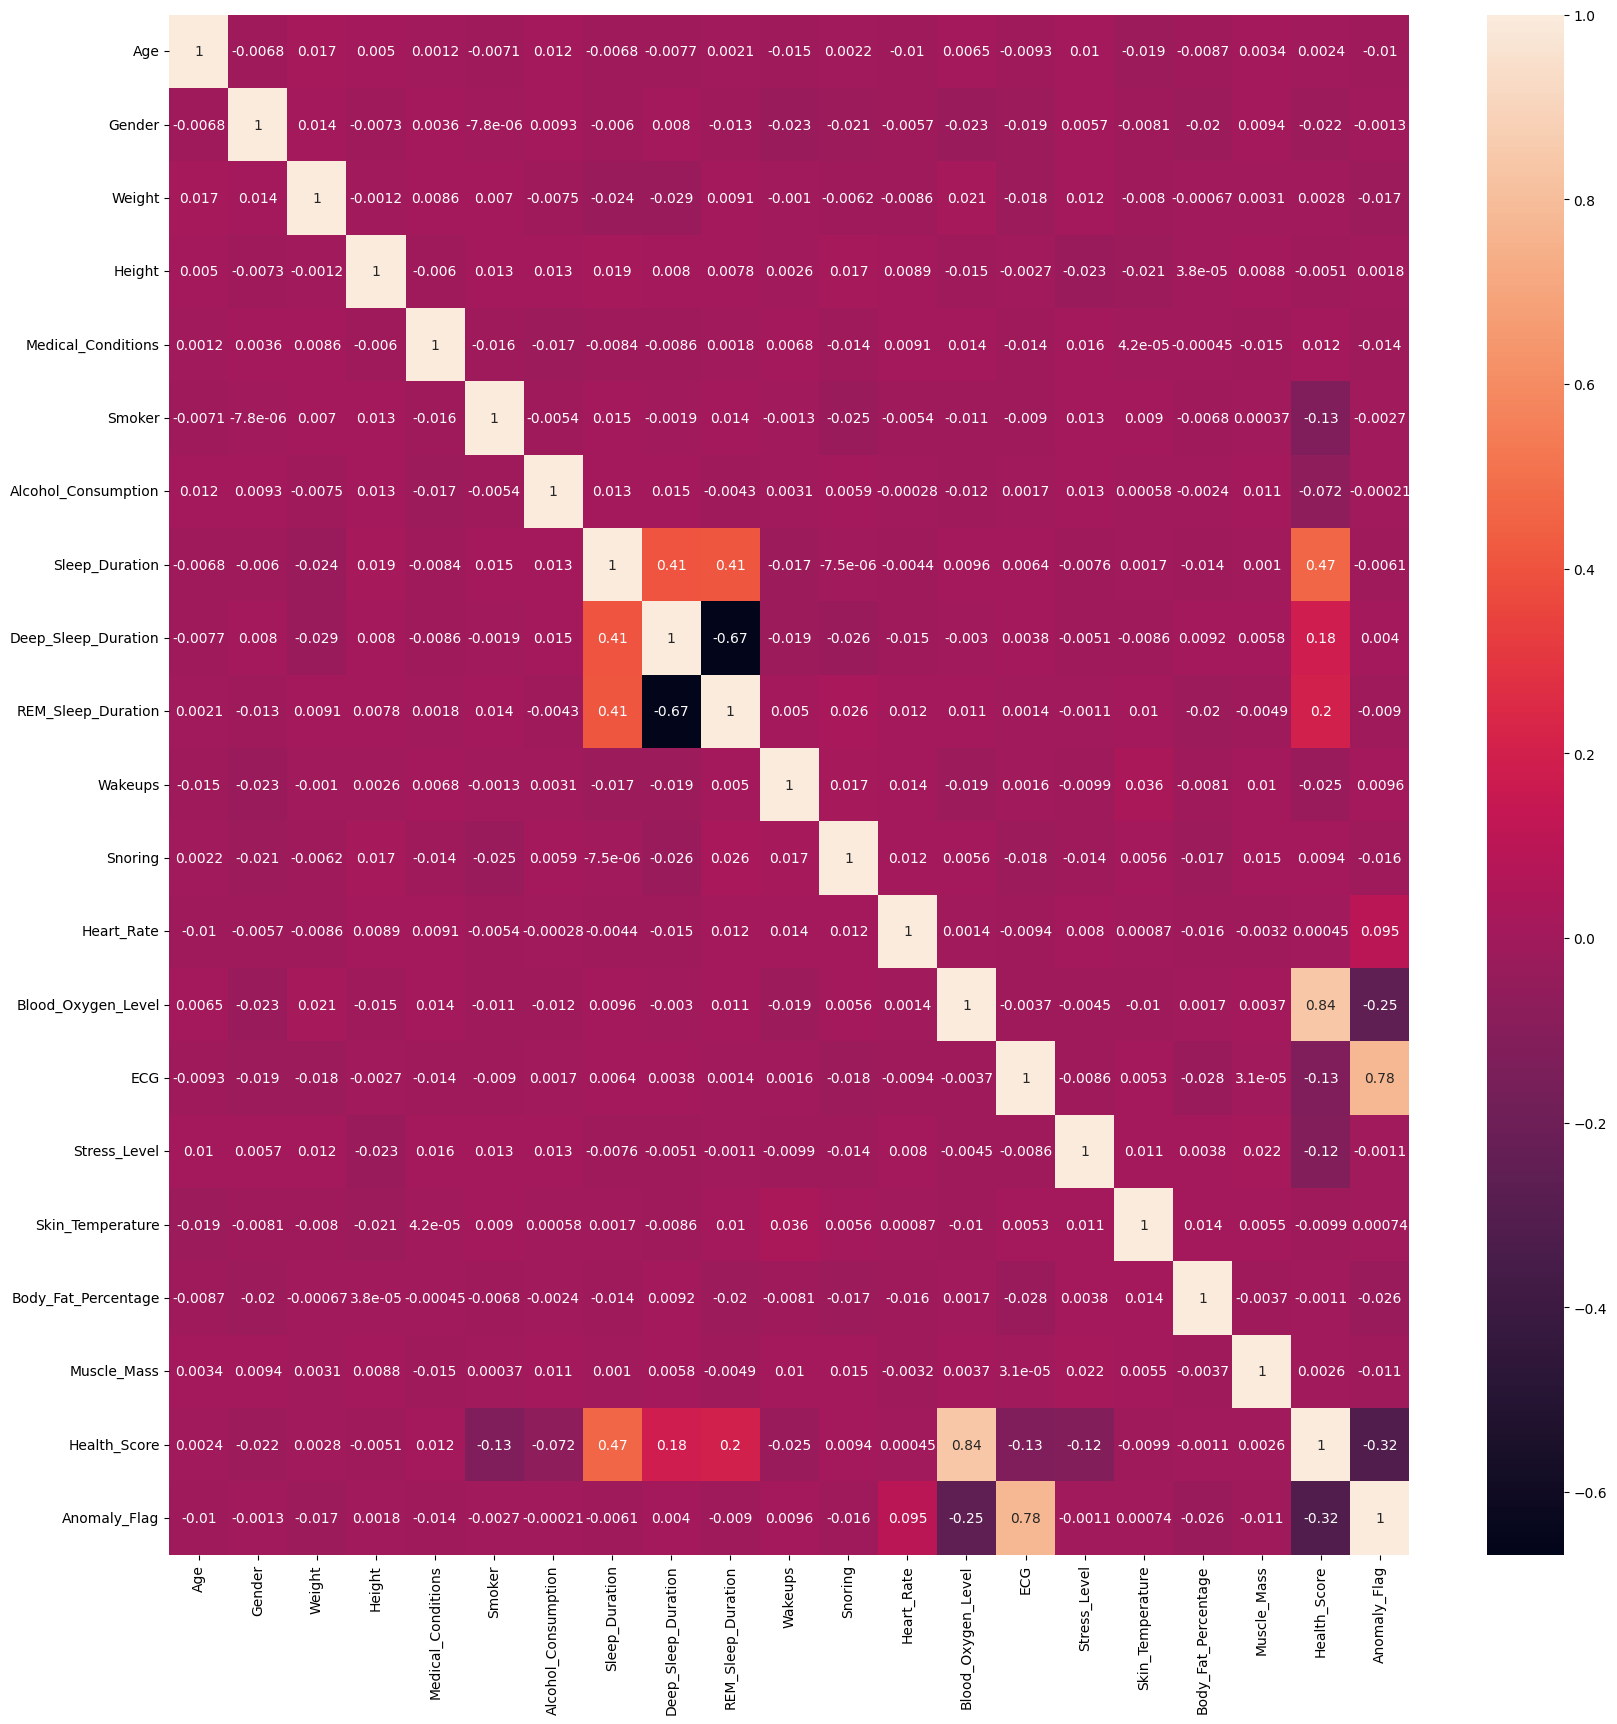

In [94]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),annot=True)

In [97]:
X = new_df.drop('Medical_Conditions',axis=1)
y = new_df['Medical_Conditions']

In [99]:
X.shape,y.shape

((6640, 20), (6640,))

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [107]:
trf1 = StandardScaler()
trf1_1 = MinMaxScaler()

trf2 = SelectKBest(f_classif,k=10)

trf3 = PCA(n_components=10)

trf4 = RandomForestClassifier(n_estimators=100,min_samples_leaf=30)

trf5 = SVC(kernel='rbf')

In [112]:
pipe1 = Pipeline(steps=[
    ('trf1',trf1),     
    ('trf4',trf4)
])

In [113]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('trf1', StandardScaler()),
                ('trf4', RandomForestClassifier(min_samples_leaf=30))])

In [114]:
y_pred_pipe1 = pipe1.predict(X_test)
print(classification_report(y_test,y_pred_pipe1))

              precision    recall  f1-score   support

           0       0.32      0.36      0.34       440
           1       0.31      0.28      0.30       445
           2       0.30      0.29      0.30       443

    accuracy                           0.31      1328
   macro avg       0.31      0.31      0.31      1328
weighted avg       0.31      0.31      0.31      1328



In [117]:
pipe2 = Pipeline(steps=[
    ('trf1',trf1),  
    ('trf3',trf3),   
    ('trf4',trf4)
])
pipe2.fit(X_train,y_train)
y_pred_pipe2 = pipe2.predict(X_test)
print(classification_report(y_test,y_pred_pipe2))

              precision    recall  f1-score   support

           0       0.32      0.37      0.34       440
           1       0.34      0.31      0.32       445
           2       0.33      0.31      0.32       443

    accuracy                           0.33      1328
   macro avg       0.33      0.33      0.33      1328
weighted avg       0.33      0.33      0.33      1328



In [118]:
pipe3 = Pipeline(steps=[
    ('trf1',trf1),  
    ('trf3',trf3),   
    ('trf5',trf5)
])
pipe3.fit(X_train,y_train)
y_pred_pipe3 = pipe3.predict(X_test)
print(classification_report(y_test,y_pred_pipe3))

              precision    recall  f1-score   support

           0       0.32      0.38      0.35       440
           1       0.33      0.35      0.34       445
           2       0.31      0.24      0.27       443

    accuracy                           0.32      1328
   macro avg       0.32      0.32      0.32      1328
weighted avg       0.32      0.32      0.32      1328



In [119]:
scaler = StandardScaler()

In [120]:
X_scaled = scaler.fit_transform(X)

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.2,random_state=42)

In [122]:
import tensorflow as tf

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [128]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    
    Dense(3, activation='softmax') 
])

c:\Users\arshi\Downloads\Desktop\Bro-Project\Health_monitor\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [129]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,891 (54.26 KB)

 Trainable params: 13,507 (52.76 KB)

 Non-trainable params: 384 (1.50 KB)

In [130]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',   
              metrics=['accuracy'])

In [131]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/200
166/166 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3323 - loss: 1.3539 - val_accuracy: 0.3268 - val_loss: 1.1132
Epoch 2/200
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3325 - loss: 1.1550 - val_accuracy: 0.3117 - val_loss: 1.1146
Epoch 3/200
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3413 - loss: 1.1277 - val_accuracy: 0.3426 - val_loss: 1.1125
Epoch 4/200
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3616 - loss: 1.1132 - val_accuracy: 0.3245 - val_loss: 1.1133
Epoch 5/200
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3797 - loss: 1.0942 - val_accuracy: 0.3441 - val_loss: 1.1090
Epoch 6/200
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3731 - loss: 1.1009 - val_accuracy: 0.3366 - val_loss: 1.1086
Epoch 7/200
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3577 - loss: 1.0972 - val_accuracy: 0.3321 - val_loss: 1.1088
Epoch 8/200
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3898 - loss: 1.0897 - val_accu

In [175]:
new_df2 = df.copy()

In [176]:
new_df2.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes,ConditionLabel
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0,2
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,3
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,2
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [177]:
new_df2.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes', 'ConditionLabel'],
      dtype='object')

In [178]:
new_df2 = new_df2.drop(columns=['Diabetes','HighBP','Stroke'],axis=1)

In [179]:
new_df2.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,ConditionLabel
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,2
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,3
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,2
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0


In [180]:
new_df2['PhysHlth'].value_counts()

PhysHlth
0.0     39915
30.0     7953
2.0      4102
1.0      2853
3.0      2438
5.0      2332
10.0     1980
15.0     1913
4.0      1376
7.0      1326
20.0     1292
14.0      802
25.0      557
6.0       447
8.0       276
21.0      229
28.0      211
12.0      205
29.0       95
9.0        55
18.0       50
16.0       50
17.0       35
27.0       34
22.0       31
23.0       27
26.0       26
13.0       26
24.0       24
11.0       22
19.0       10
Name: count, dtype: int64

In [181]:
numeric_cols = new_df2.select_dtypes(include=['float64', 'int64']).columns

In [182]:



for col in numeric_cols[:8]:
    Q1 = new_df2[col].quantile(0.25)
    Q3 = new_df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = new_df2[(new_df2[col] < lower_bound) | (new_df2[col] > upper_bound)]

    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print('-'*30)

Column: Age
Number of outliers: 0
------------------------------
Column: Sex
Number of outliers: 0
------------------------------
Column: HighChol
Number of outliers: 0
------------------------------
Column: CholCheck
Number of outliers: 1749
------------------------------
Column: BMI
Number of outliers: 2181
------------------------------
Column: Smoker
Number of outliers: 0
------------------------------
Column: HeartDiseaseorAttack
Number of outliers: 10449
------------------------------
Column: PhysActivity
Number of outliers: 0
------------------------------


In [183]:
for col in numeric_cols[8:]:
    Q1 = new_df2[col].quantile(0.25)
    Q3 = new_df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = new_df2[(new_df2[col] < lower_bound) | (new_df2[col] > upper_bound)]

    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print('-'*30)

Column: Fruits
Number of outliers: 0
------------------------------
Column: Veggies
Number of outliers: 14932
------------------------------
Column: HvyAlcoholConsump
Number of outliers: 3020
------------------------------
Column: GenHlth
Number of outliers: 0
------------------------------
Column: MentHlth
Number of outliers: 11816
------------------------------
Column: PhysHlth
Number of outliers: 10624
------------------------------
Column: DiffWalk
Number of outliers: 0
------------------------------
Column: ConditionLabel
Number of outliers: 0
------------------------------


In [184]:
new_df2.shape

(70692, 16)

In [185]:
new_df2.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
ConditionLabel          0
dtype: int64

In [186]:
Q1 = new_df2['MentHlth'].quantile(0.25)
Q3 = new_df2['MentHlth'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_df2['MentHlth'] = new_df2['MentHlth'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

In [187]:
Q1 = new_df2['PhysHlth'].quantile(0.25)
Q3 = new_df2['PhysHlth'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_df2['PhysHlth'] = new_df2['PhysHlth'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

<Axes: >

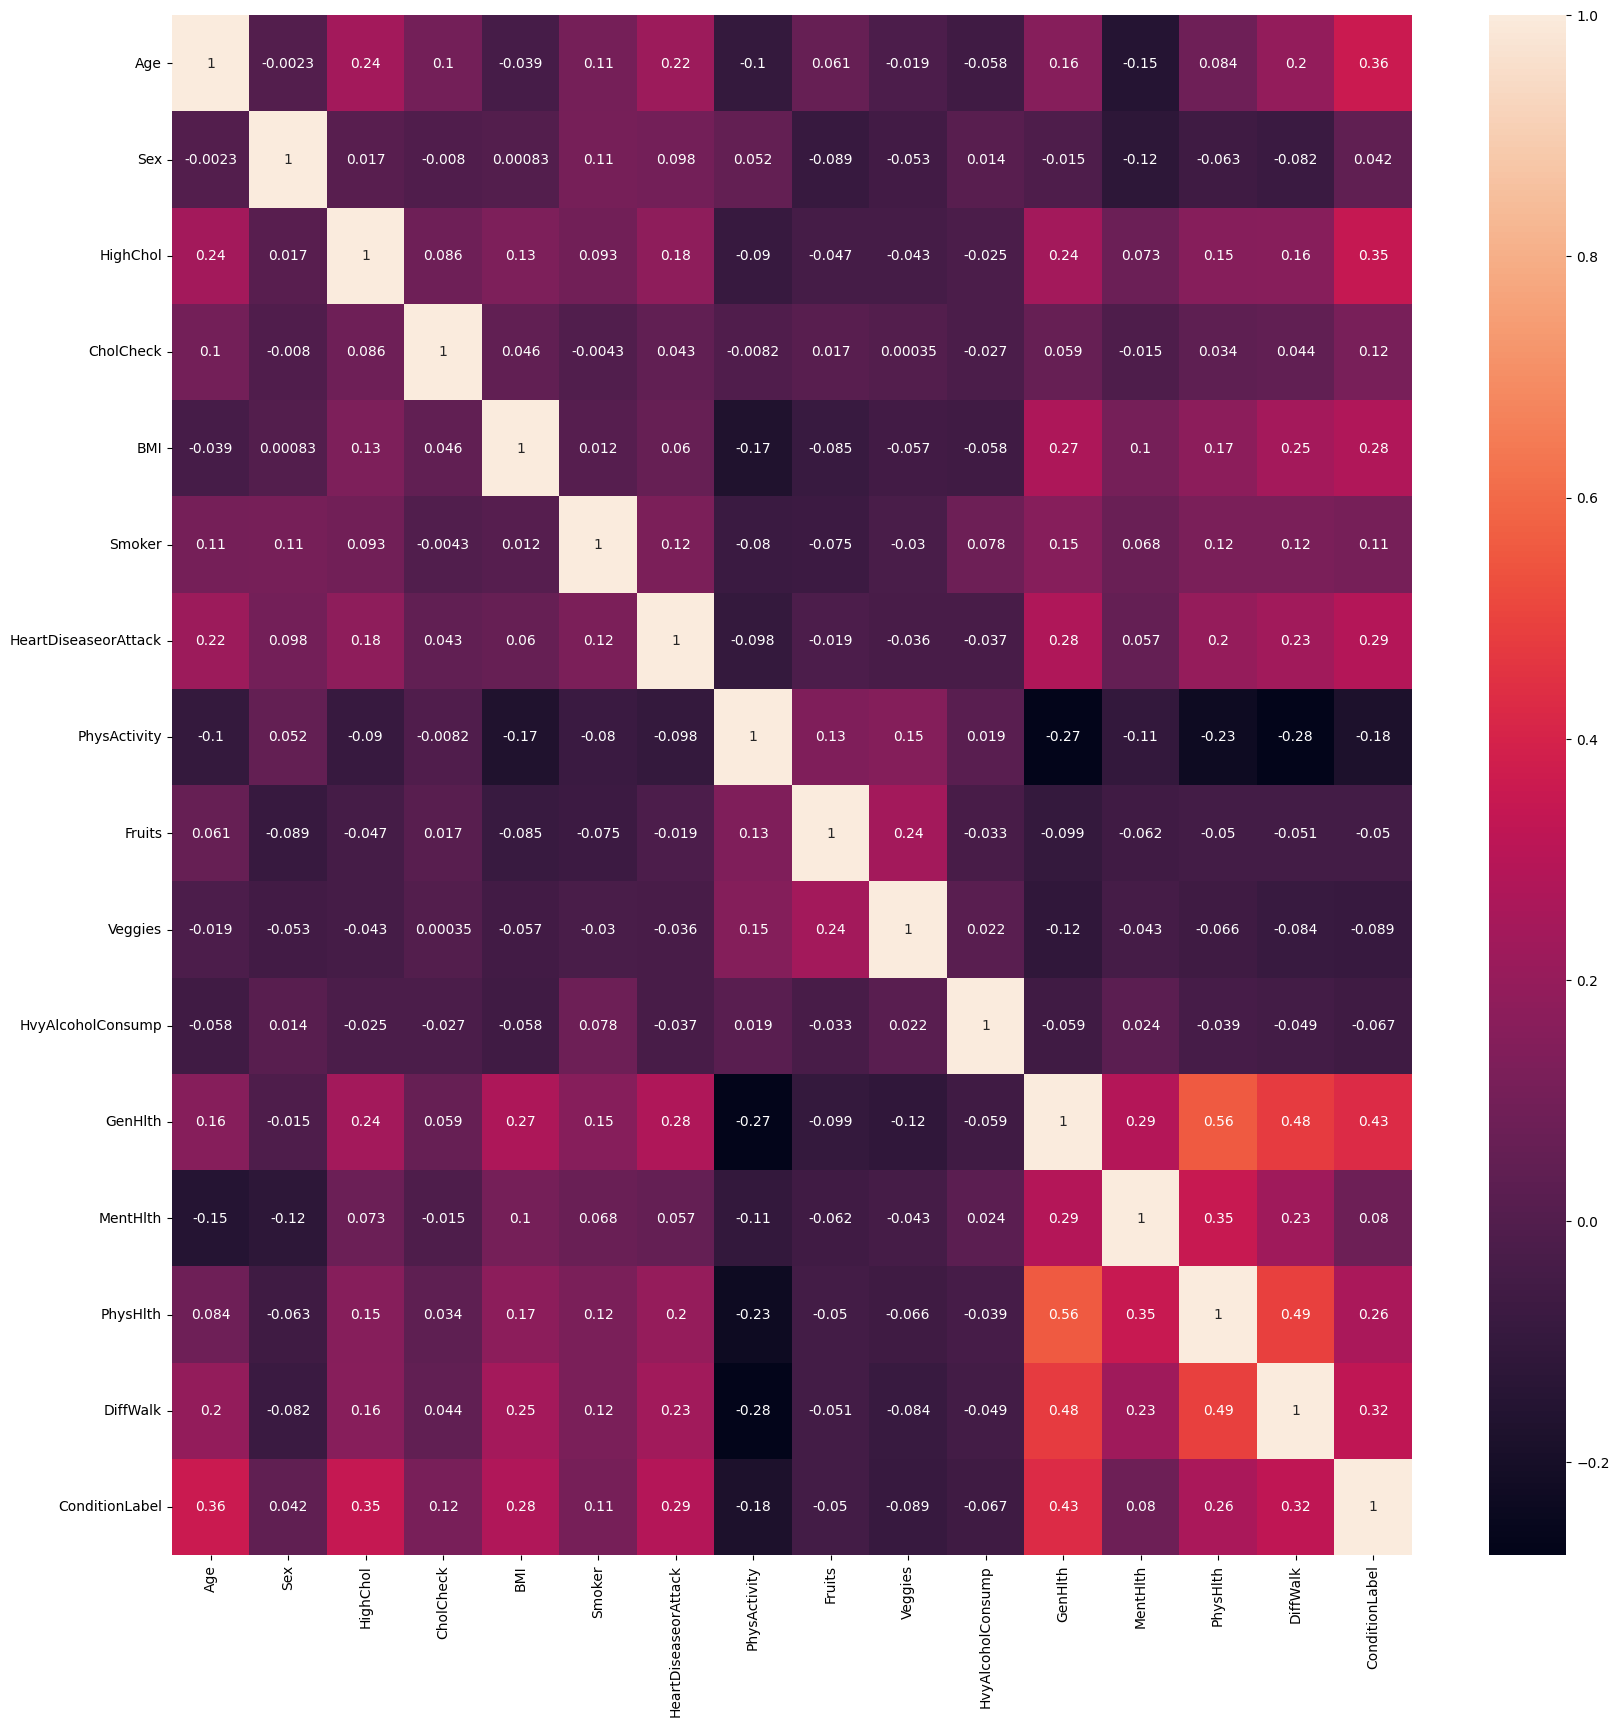

In [188]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df2.corr(),annot=True)

In [189]:
new_df2.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,ConditionLabel
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,15.0,0.0,2
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,3
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,2
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0


<Axes: ylabel='Age'>

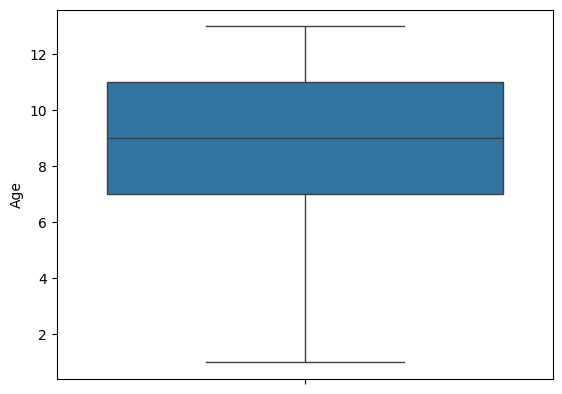

In [163]:
sns.boxplot(new_df2['Age'])

In [190]:
X = new_df2.drop('ConditionLabel', axis=1)
y = new_df2['ConditionLabel']

In [191]:
encoder = StandardScaler()

In [192]:
X_scaled = scaler.fit_transform(X)

In [193]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.2,random_state=42)

In [194]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    
    Dense(8, activation='softmax') 
])

c:\Users\arshi\Downloads\Desktop\Bro-Project\Health_monitor\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [195]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',   
              metrics=['accuracy'])

In [196]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.4813 - loss: 1.4394 - val_accuracy: 0.5382 - val_loss: 1.2489
Epoch 2/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5323 - loss: 1.2753 - val_accuracy: 0.5403 - val_loss: 1.2414
Epoch 3/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5359 - loss: 1.2611 - val_accuracy: 0.5399 - val_loss: 1.2396
Epoch 4/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5400 - loss: 1.2534 - val_accuracy: 0.5389 - val_loss: 1.2393
Epoch 5/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5377 - loss: 1.2507 - val_accuracy: 0.5414 - val_loss: 1.2397
Epoch 6/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5384 - loss: 1.2554 - val_accuracy: 0.5403 - val_loss: 1.2367
Epoch 7/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5403 - loss: 1.2475 - val_accuracy: 0.5413 - val_loss: 1.2379
Epoch 8/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5395 - loss: 1.2461 

In [197]:
pipe_second = Pipeline(steps=[
    ('trf1',trf1),  
    ('trf3',trf3),   
    ('trf5',trf5)
])
pipe_second.fit(X_train,y_train)
y_pred_pipe_sec = pipe_second.predict(X_test)
print(classification_report(y_test,y_pred_pipe_sec))

              precision    recall  f1-score   support

           0       0.61      0.78      0.69      4344
           1       0.00      0.00      0.00      1649
           2       0.40      0.02      0.04      2524
           3       0.00      0.00      0.00       161
           4       0.49      0.88      0.63      4724
           5       0.00      0.00      0.00       102
           6       0.00      0.00      0.00       574
           7       0.00      0.00      0.00        61

    accuracy                           0.54     14139
   macro avg       0.19      0.21      0.17     14139
weighted avg       0.42      0.54      0.43     14139



c:\Users\arshi\Downloads\Desktop\Bro-Project\Health_monitor\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arshi\Downloads\Desktop\Bro-Project\Health_monitor\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arshi\Downloads\Desktop\Bro-Project\Health_monitor\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [198]:
pipe_second2 = Pipeline(steps=[
      
    ('trf3',trf3),   
    ('trf4',trf4)
])
pipe_second2.fit(X_train,y_train)
y_pred_pipe_sec2 = pipe_second2.predict(X_test)
print(classification_report(y_test,y_pred_pipe_sec2))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68      4344
           1       0.33      0.00      0.00      1649
           2       0.29      0.04      0.07      2524
           3       0.00      0.00      0.00       161
           4       0.49      0.86      0.63      4724
           5       0.00      0.00      0.00       102
           6       0.67      0.00      0.01       574
           7       0.00      0.00      0.00        61

    accuracy                           0.53     14139
   macro avg       0.30      0.21      0.17     14139
weighted avg       0.47      0.53      0.43     14139



c:\Users\arshi\Downloads\Desktop\Bro-Project\Health_monitor\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arshi\Downloads\Desktop\Bro-Project\Health_monitor\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arshi\Downloads\Desktop\Bro-Project\Health_monitor\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [2]:
import pandas as pd

In [3]:
df4 = pd.read_csv("data\\diabetes_prediction_dataset.csv")

In [4]:
new_df3 = df4.copy() 

In [5]:
new_df3.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
new_df3['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [202]:
new_df3.shape

(100000, 9)

In [203]:
new_df3.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [204]:
new_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [205]:
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
ConditionLabel          0
dtype: int64

In [13]:
print(new_df3.duplicated().sum())

3854


In [14]:
new_df3 = new_df3.drop_duplicates()

In [15]:
print(new_df3.duplicated().sum())

0


In [16]:
# Function to add counts on bars
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

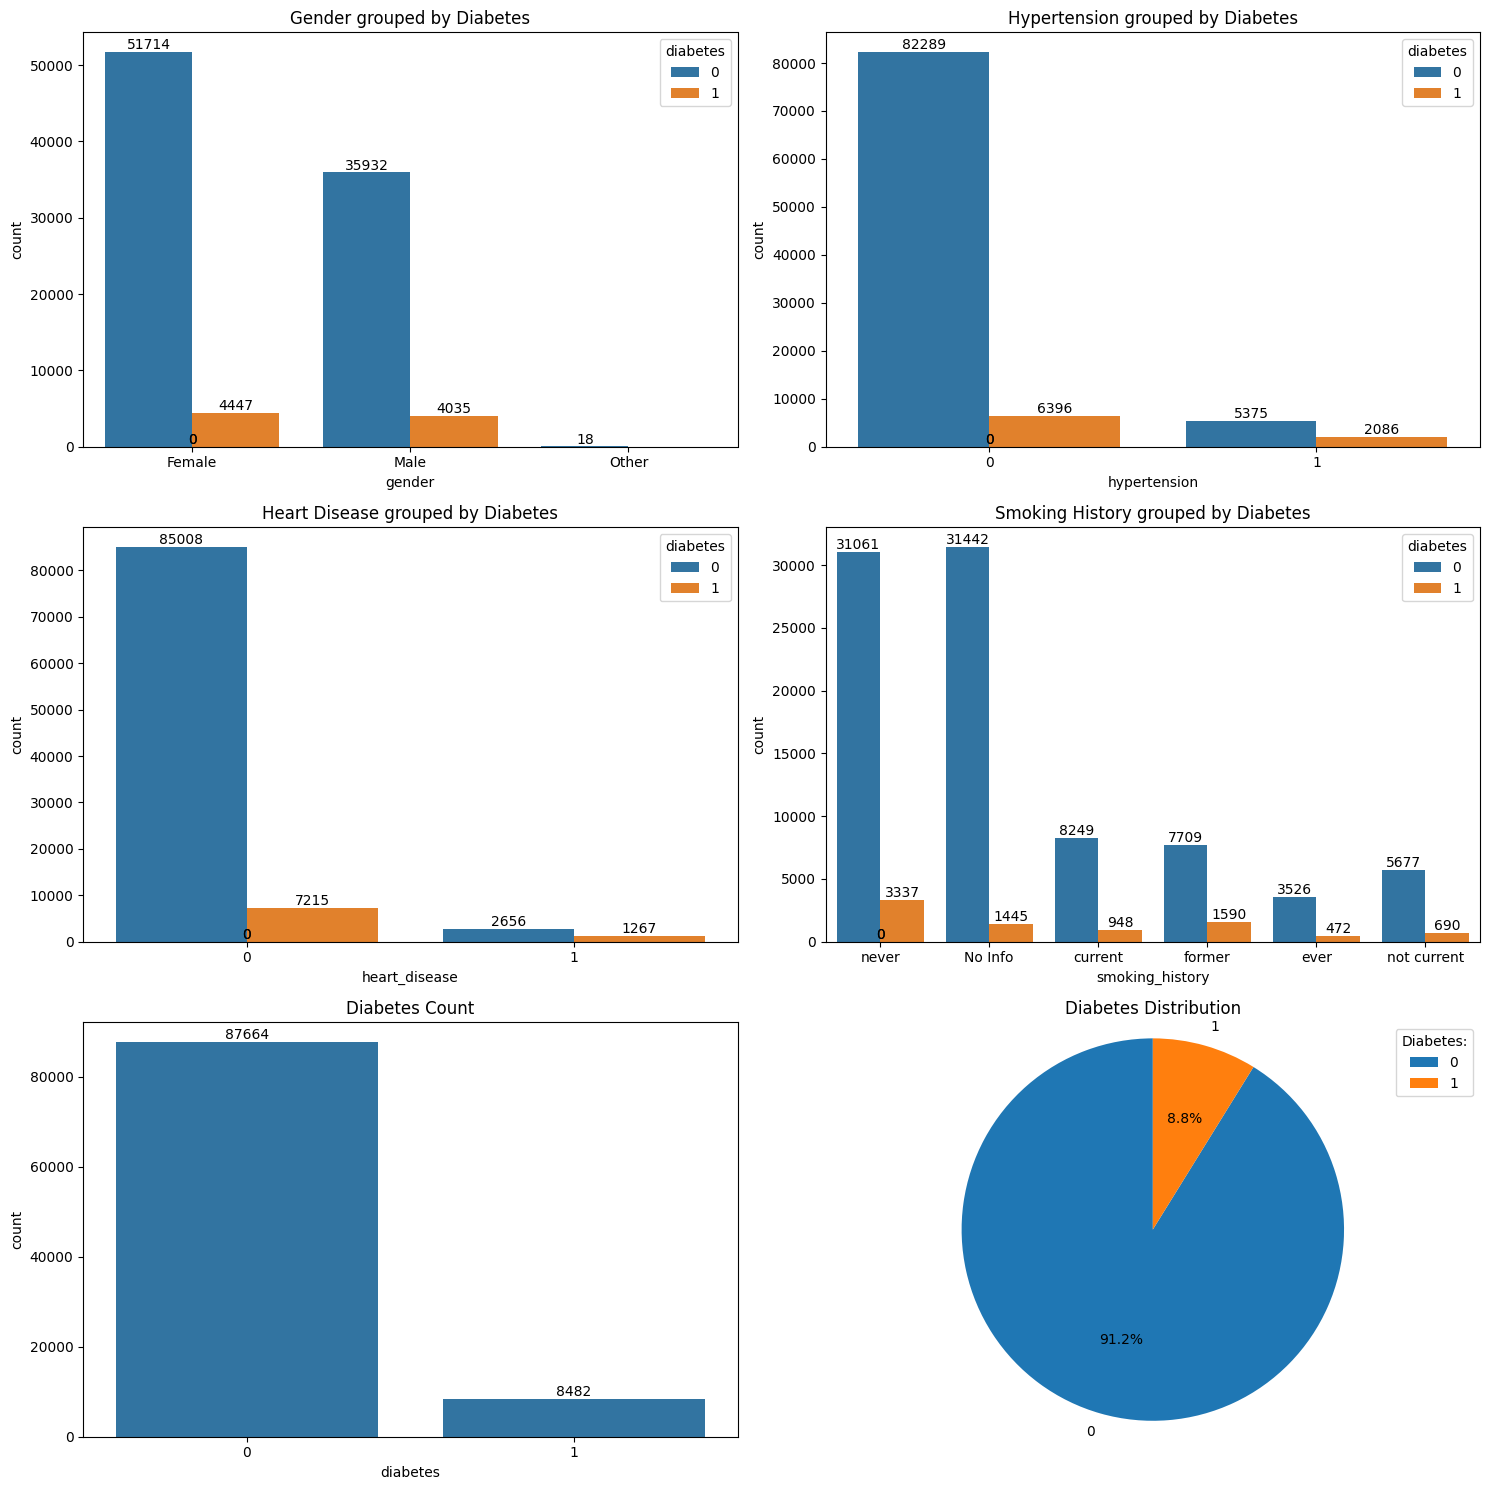

In [24]:
# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot gender grouped by diabetes
ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=new_df3)
axes[0, 0].set_title('Gender grouped by Diabetes')
add_counts(ax)

# Plot hypertension grouped by diabetes
ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=new_df3)
axes[0, 1].set_title('Hypertension grouped by Diabetes')
add_counts(ax)

# Plot heart disease grouped by diabetes
ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=new_df3)
axes[1, 0].set_title('Heart Disease grouped by Diabetes')
add_counts(ax)

# Plot smoking history grouped by diabetes
ax = sns.countplot(ax=axes[1, 1], x='smoking_history', hue='diabetes', data=new_df3)
axes[1, 1].set_title('Smoking History grouped by Diabetes')
add_counts(ax)

# Plot diabetes
ax = sns.countplot(ax=axes[2, 0], x='diabetes', data=new_df3)
axes[2, 0].set_title('Diabetes Count')
add_counts(ax)

# Create pie plot for diabetes
diabetes_counts = new_df3['diabetes'].value_counts()
axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title('Diabetes Distribution')
axes[2, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[2, 1].legend(title='Diabetes:', loc='upper right')
# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [25]:
# Calculate minimum, maximum, and average age
min_age = new_df3['age'].min()
max_age = new_df3['age'].max()
avg_age = new_df3['age'].mean()

In [26]:
diabetes_counts = new_df3['diabetes'].value_counts()

In [27]:
grouped_ages = new_df3.groupby('diabetes')['age'].agg(['min', 'max'])

In [28]:
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print(f"Average age: {avg_age}")
print("Diabetes Counts:")
print(diabetes_counts)
print("Age Statistics by Diabetes Status:")
print(grouped_ages)

Minimum age: 0.08
Maximum age: 80.0
Average age: 41.79432571297817
Diabetes Counts:
diabetes
0    87664
1     8482
Name: count, dtype: int64
Age Statistics by Diabetes Status:
           min   max
diabetes            
0         0.08  80.0
1         3.00  80.0


**Minimum age how have diabetes is 3 year & Maximum is 80**
**Minimum age how have not diabetes is 0.08 year & Maximum is 80**

In [30]:
import pickle

In [29]:
le2 = LabelEncoder()
new_df3['gender'] = le2.fit_transform(new_df3['gender'])
new_df3['smoking_history'] = le2.fit_transform(new_df3['smoking_history'])

In [31]:
with open("label_encoder.pkl","wb") as f:
    pickle.dump(le2,f)

In [32]:
features = ['gender', 'age', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = new_df3[features]
y = new_df3['diabetes']

# Standardizing the features
scaler2 = StandardScaler()
X_scaled = scaler2.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

C:\Users\arshi\AppData\Local\Temp\ipykernel_27956\929525614.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate(f'Max: PC {max_index + 1}',


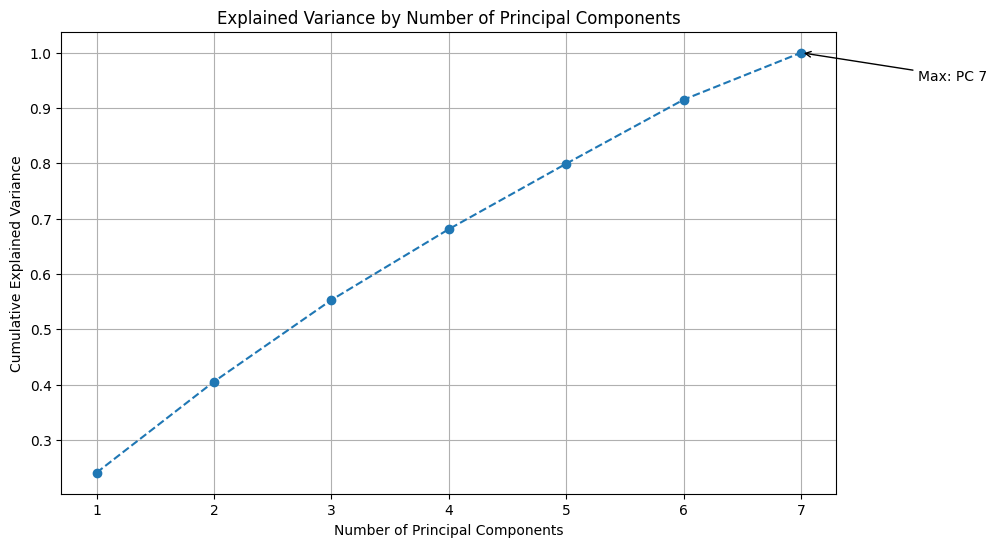

In [247]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Find the index of the maximum cumulative explained variance
max_index = pca.explained_variance_ratio_.cumsum().argmax()

# Annotate the point with the highest cumulative explained variance
plt.annotate(f'Max: PC {max_index + 1}',
             xy=(max_index + 1, pca.explained_variance_ratio_.cumsum()[max_index]),
             xytext=(max_index + 2, pca.explained_variance_ratio_.cumsum()[max_index] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'))

plt.show()


In [248]:
for i, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(f'Principal Component {i+1}: {ratio:.4f} cumulative explained variance')

Principal Component 1: 0.2410 cumulative explained variance
Principal Component 2: 0.4055 cumulative explained variance
Principal Component 3: 0.5531 cumulative explained variance
Principal Component 4: 0.6811 cumulative explained variance
Principal Component 5: 0.7995 cumulative explained variance
Principal Component 6: 0.9152 cumulative explained variance
Principal Component 7: 1.0000 cumulative explained variance


In [249]:
n_components = max_index + 1


pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [221]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [251]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [252]:
y_pred = xgb_model.predict(X_test)

In [253]:
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')
print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred)}')

XGBoost Accuracy: 0.9659
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17509
           1       0.93      0.67      0.78      1721

    accuracy                           0.97     19230
   macro avg       0.95      0.83      0.88     19230
weighted avg       0.96      0.97      0.96     19230



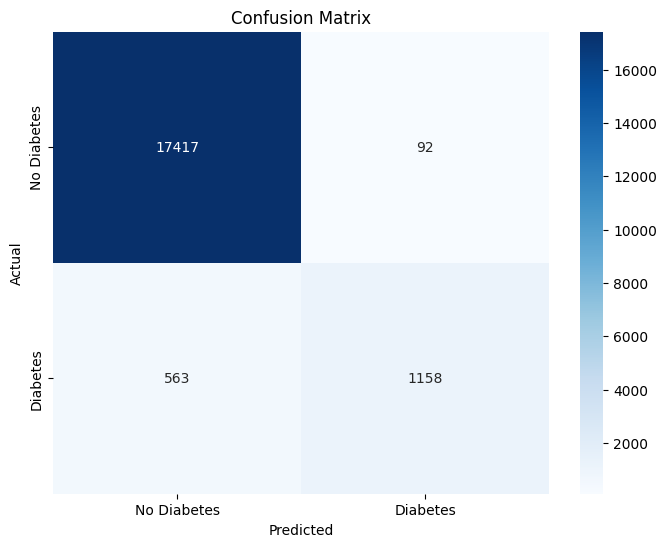

In [254]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [256]:
import pickle


with open('Diabetes_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [257]:
with open('Diabetes_scaler.pkl', 'wb') as f:
    pickle.dump(scaler2, f)

In [258]:
with open('Diabetes_pca.pkl', 'wb') as f:
    pickle.dump(pca, f)

## Model for Hypertension

In [33]:
import xgboost as xgb

In [34]:
features = ['gender', 'age', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level',"diabetes"]
X = new_df3[features]
y = new_df3['hypertension']

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
smote = SMOTE(random_state=42,k_neighbors=5)

In [37]:
X,y = smote.fit_resample(X,y)

In [38]:
scaler3 = StandardScaler()
X_scaled = scaler3.fit_transform(X)

# Applying PCA
pca3 = PCA()
X_pca = pca3.fit_transform(X_scaled)

C:\Users\arshi\AppData\Local\Temp\ipykernel_9004\3221997000.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate(f'Max: PC {max_index + 1}',


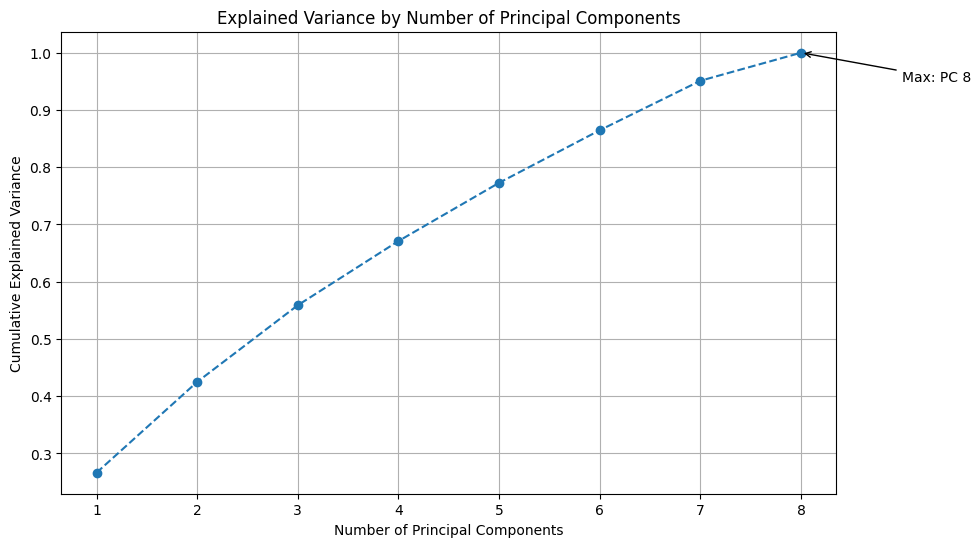

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca3.explained_variance_ratio_) + 1), 
         pca3.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Find the index of the maximum cumulative explained variance
max_index = pca3.explained_variance_ratio_.cumsum().argmax()

# Annotate the point with the highest cumulative explained variance
plt.annotate(f'Max: PC {max_index + 1}',
             xy=(max_index + 1, pca3.explained_variance_ratio_.cumsum()[max_index]),
             xytext=(max_index + 2, pca3.explained_variance_ratio_.cumsum()[max_index] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'))

plt.show()


In [40]:
for i, ratio in enumerate(pca3.explained_variance_ratio_.cumsum()):
    print(f'Principal Component {i+1}: {ratio:.4f} cumulative explained variance')

Principal Component 1: 0.2663 cumulative explained variance
Principal Component 2: 0.4249 cumulative explained variance
Principal Component 3: 0.5589 cumulative explained variance
Principal Component 4: 0.6710 cumulative explained variance
Principal Component 5: 0.7728 cumulative explained variance
Principal Component 6: 0.8646 cumulative explained variance
Principal Component 7: 0.9510 cumulative explained variance
Principal Component 8: 1.0000 cumulative explained variance


In [41]:
n_components = max_index + 1


pca3 = PCA(n_components=n_components)
X_pca = pca3.fit_transform(X_scaled)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [43]:
xgb_clf = xgb.XGBClassifier( eval_metric='logloss')

In [44]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [45]:
y_pred = xgb_clf.predict(X_test)

In [46]:
classificationReport = classification_report(y_test, y_pred)
print(classificationReport)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78     17728
           1       0.76      0.86      0.81     17746

    accuracy                           0.80     35474
   macro avg       0.80      0.80      0.80     35474
weighted avg       0.80      0.80      0.80     35474



In [48]:
with open('hypertension_model.pkl', 'wb') as f:
    pickle.dump(xgb_clf, f)

In [49]:
with open('hypertension_scaler.pkl', 'wb') as f:
    pickle.dump(scaler3, f)

In [50]:
with open('hypertension_pca.pkl', 'wb') as f:
    pickle.dump(pca3, f)

In [317]:
neg = (y == 0).sum()
pos = (y == 1).sum()
scale_pos_weight = neg / pos

In [318]:
scale_pos_weight

np.float64(1.0)

In [319]:

model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc'
)

In [320]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [321]:
y_pred_2 = model.predict(X_test)

In [322]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78     17728
           1       0.76      0.86      0.81     17746

    accuracy                           0.80     35474
   macro avg       0.80      0.80      0.80     35474
weighted avg       0.80      0.80      0.80     35474



In [301]:
new_df3.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<Axes: >

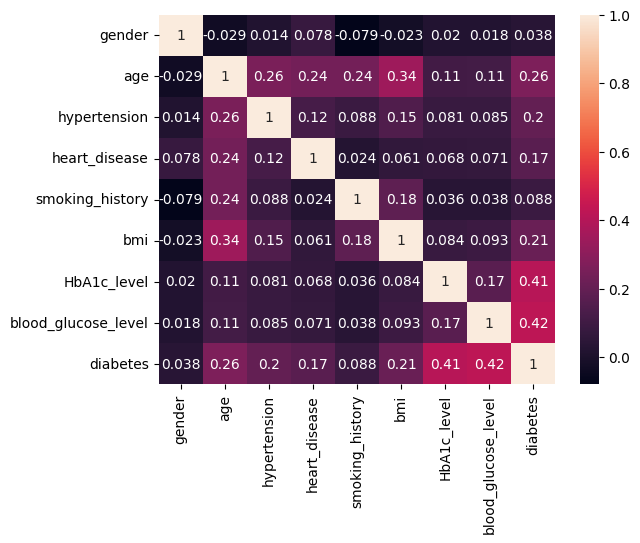

In [245]:
sns.heatmap(new_df3.corr(),annot=True)